# <font color="#114b98">Conception d'une application au service de la santé publique</font>

## <font color="#114b98">II - Notebook d'analyse</font>

Afin de répondre aux **enjeux climatiques et démographiques** des années à venir, "Santé Publique France" souhaite concevoir une application proposant des **alternatives à la consommation de viandes animales et de poissons**.

Après avoir scanné le code produit d'un article, cette application vous propose une série de produits alimentaires qui vous apporteront **une quantité similaire de substrats énergétiques**. 

Je vais dans ce second notebook **réaliser des analyses univariées, bivariées et multivariées**, ainsi que des **réductions dimentionnelles**.

## <font color="#114b98">Sommaire</font>
[1. Chargement du dataset](#section_1)

[2. Analyse univariée](#section_2)

[3. Analyse bivariée](#section_3)       

[4. Analyse multivariée](#section_4)      

[5. Réduction dimentionnelle](#section_5)

[6. Exemple d'association pour l'application](#section_6)

## <font color="#114b98" id="section_1">1. Chargement du dataset</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
sns.set()

In [3]:
df = pd.read_csv('../1 - Projets/Projet 2/fr.openfoodfacts.org.products_cleaned.csv', low_memory=False)
df.drop('Unnamed: 0', inplace=True, axis=1)

In [4]:
data = df.copy()

In [5]:
data.head()

code                categories  energy_100g  proteins_100g  \
0  0000000000100                 Moutardes        936.0            5.1   
1  0000000001281  Tartes à la noix de coco       1594.0            4.6   
2  0000000001885         Compotes de poire        657.0            0.6   
3  0000000002257     Macédoines de légumes        598.0            1.9   
4  0000000005166         Cuisses de poulet        824.0           17.0   

   carbohydrates_100g  fat_100g  sugars_100g  saturated-fat_100g  salt_100g  \
0                29.0       8.2         22.0                 2.2       4.60   
1                27.3      22.0         21.9                15.5       0.10   
2                36.0       0.0         27.0                 0.0       0.00   
3                 3.9      12.7          1.0                 1.0       0.27   
4                 3.0      13.0          0.9                 4.0       1.10   

   fruits-veg-nuts_100g  fiber_100g nutriscore            régime  
0                   0.0         0.0          D   autres_produits  
1                   0.0         4.4          D   autres_produits  
2                   0.0         3.6          A   autres_produits  
3                   0.0         0.0          B   autres_produits  
4                   0.0         0.0          C  viandes_poissons

In [6]:
print("Le dataset compte {} lignes et {} colonnes.".format(data.shape[0], data.shape[1]))

Le dataset compte 280035 lignes et 13 colonnes.


In [7]:
print('Données manquantes (%) : ', data.isna().sum().sum()/(data.shape[0]*data.shape[1])*100)

Données manquantes (%) :  0.0


In [8]:
data.isna().sum()

code                    0
categories              0
energy_100g             0
proteins_100g           0
carbohydrates_100g      0
fat_100g                0
sugars_100g             0
saturated-fat_100g      0
salt_100g               0
fruits-veg-nuts_100g    0
fiber_100g              0
nutriscore              0
régime                  0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280035 entries, 0 to 280034
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   code                  280035 non-null  object 
 1   categories            280035 non-null  object 
 2   energy_100g           280035 non-null  float64
 3   proteins_100g         280035 non-null  float64
 4   carbohydrates_100g    280035 non-null  float64
 5   fat_100g              280035 non-null  float64
 6   sugars_100g           280035 non-null  float64
 7   saturated-fat_100g    280035 non-null  float64
 8   salt_100g             280035 non-null  float64
 9   fruits-veg-nuts_100g  280035 non-null  float64
 10  fiber_100g            280035 non-null  float64
 11  nutriscore            280035 non-null  object 
 12  régime                280035 non-null  object 
dtypes: float64(9), object(4)
memory usage: 27.8+ MB


In [10]:
data.describe()

energy_100g  proteins_100g  carbohydrates_100g       fat_100g  \
count  280035.000000  280035.000000       280035.000000  280035.000000   
mean     1141.559538       8.263048           26.360363      14.374179   
std       816.962642       9.094150           27.236579      18.453486   
min         0.000000       0.000000            0.000000       0.000000   
25%       458.000000       1.300000            2.700000       1.000000   
50%      1050.000000       6.000000           13.000000       7.500000   
75%      1660.000000      12.000000           51.000000      22.000000   
max     11431.000000     100.000000          100.000000     100.000000   

         sugars_100g  saturated-fat_100g      salt_100g  fruits-veg-nuts_100g  \
count  280035.000000       280035.000000  280035.000000         280035.000000   
mean       13.447742            5.459670       1.093867              9.107661   
std        19.636440            8.426396       3.824269             22.897357   
min         0.000000            0.000000       0.000000              0.000000   
25%         0.700000            0.200000       0.030000              0.000000   
50%         3.500000            2.000000       0.460000              0.000000   
75%        19.000000            7.800000       1.200000              1.000000   
max       100.000000          100.000000     100.000000            100.000000   

          fiber_100g  
count  280035.000000  
mean        1.527891  
std         3.567819  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.900000  
max       100.000000

## <font color="#114b98" id="section_2">2. Analyse univariée</font>

Je regarde la répartition de la variable 'régime'.

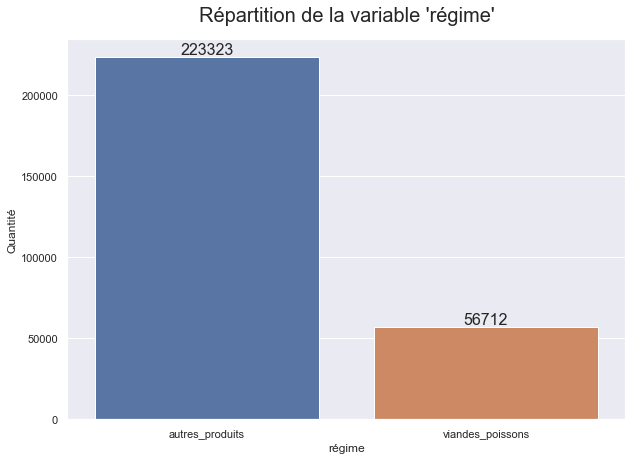

In [11]:
fig = plt.figure(figsize=(10,7))
ax = sns.countplot(x=data['régime'])
plt.title("Répartition de la variable 'régime'", size = 20, y=1.03)
plt.ylabel('Quantité', fontsize=12)
ax.bar_label(ax.containers[0], label_type='edge', size = 16);

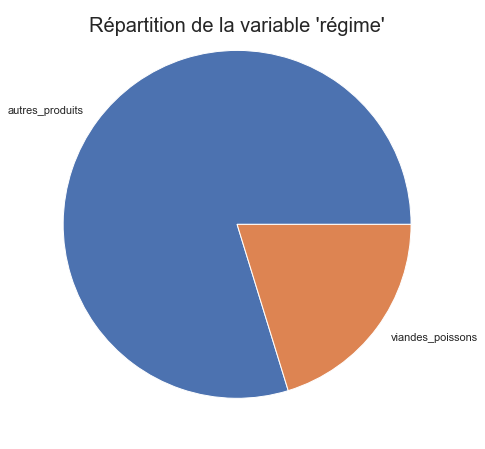

In [12]:
count_df = data['régime'].value_counts()
fig = plt.figure(figsize=(12,8))
plt.title("Répartition de la variable 'régime'", size = 20, y=0.93)
plt.pie(count_df.values, labels=count_df.index);

Je vois qu'un peu moins de 1/5ème des produits sont catégorisés dans 'régime' par 'viandes_poissons', ce qui est cohérent.

Je regarde aussi quelles sont les 30 catégories les plus présentes.

In [13]:
temp = data.copy()
gp = temp.categories.value_counts()[0:30]

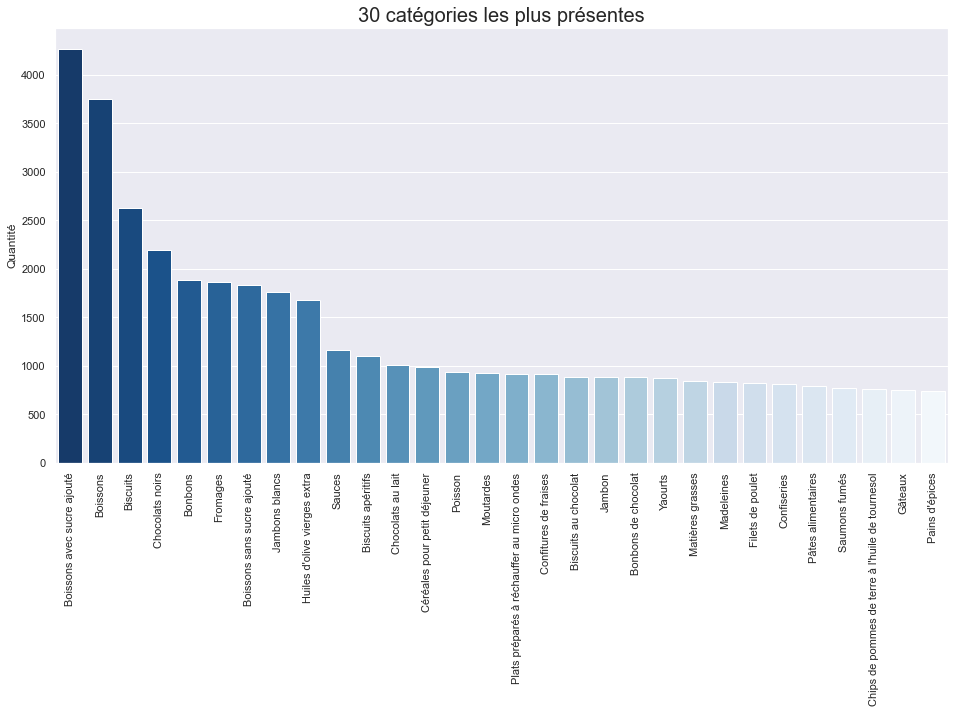

In [14]:
fig = plt.figure(figsize=(16,8))
sns.barplot(x = gp.index, y = gp.values, palette = "Blues_r")
plt.title('30 catégories les plus présentes', size = 20)
plt.xticks(rotation=90)
plt.ylabel('Quantité')
plt.show()

Parmi les 30 catégories les plus représentées, on retrouve les viandes et poissons suivants :
 - Jambons blancs
 - Poisson
 - Jambon
 - Filets de poulet
 - Saumons fumés

Je regarde aussi la répartition des nutriscores des différentes observations.

In [15]:
count_nutri_df = data['nutriscore'].value_counts()

In [16]:
count_nutri_df.sort_index(axis=0, inplace = True)

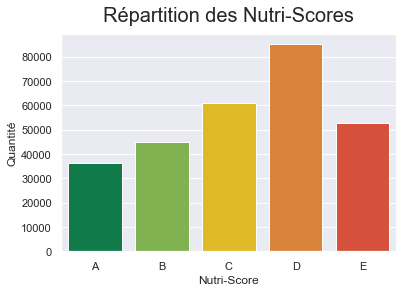

In [17]:
plt.title("Répartition des Nutri-Scores", size = 20, y=1.03)
plt.ylabel('Quantité', fontsize=12)
plt.xlabel('Nutri-Score', fontsize=12)
nutri_colors = {'A':'#008B4C','B':'#7FC241','C':'#FECA0A','D':'#F58220','E':'#EF3E22'}
sns.barplot(x=count_nutri_df.index, y=count_nutri_df.values, palette=nutri_colors);

Je charge les deux autres datasets sauvegardés dans le notebook de nettoyage afin de comparer l'impact du nettoyage et de l'imputation sur les différentes variables.

In [18]:
df_before_cleaning = pd.read_csv('../1 - Projets/Projet 2/fr.openfoodfacts.org.products_b_cleaning.csv', low_memory=False)
df_before_cleaning.drop('Unnamed: 0', inplace=True, axis=1)

# Je fais un léger nettoyage de ce notebook afin d'enlever les valeurs aberrantes des variables quantitatives (<0 et >100).
df_bc_se = df_before_cleaning.copy()
df_bc_se.drop(['energy_100g','nutrition-score-fr_100g','nutriscore_score','nutriscore_grade'], inplace=True, axis=1)
mask = (df_bc_se.loc[:,df_bc_se.columns]>100)
df_bc_se.where(~mask, other = np.nan, inplace = True)
df_before_cleaning.loc[:,'proteins_100g':'fiber_100g'] = df_bc_se
mask = (df_before_cleaning.select_dtypes(include=['float64']) < 0)
df_before_cleaning.select_dtypes(include=['float64']).where(~mask, other = np.nan, inplace = True)
df_before_cleaning['energy_100g'].where(~(df_before_cleaning['energy_100g']>12000), other = np.nan, inplace = True)
df_before_cleaning.drop(['nutrition-score-fr_100g','nutriscore_score','nutriscore_grade'], inplace=True, axis=1)

df_before_cleaning.shape

(658006, 9)

In [19]:
df_before_cleaning.describe()

energy_100g  proteins_100g  carbohydrates_100g       fat_100g  \
count  510064.000000  506825.000000       505232.000000  505236.000000   
mean     1139.320346       8.505158           27.567904      13.810799   
std       810.931730       9.763835           27.541318      17.049735   
min         0.000000       0.000000            0.000000       0.000000   
25%       460.000000       1.400000            3.000000       1.000000   
50%      1075.000000       6.000000           15.000000       7.800000   
75%      1664.000000      12.000000           52.000000      21.900000   
max     11431.000000     100.000000          100.000000     100.000000   

         sugars_100g  saturated-fat_100g      salt_100g  fruits-veg-nuts_100g  \
count  508497.000000       508720.000000  481600.000000         205654.000000   
mean       13.960032            5.251052       1.249972             11.858760   
std        20.094289            7.785219       4.271172             25.343334   
min         0.000000            0.000000       0.000000              0.000000   
25%         0.700000            0.200000       0.050800              0.000000   
50%         3.600000            2.000000       0.500000              0.000000   
75%        20.500000            7.600000       1.300000              8.800000   
max       100.000000          100.000000     100.000000            100.000000   

          fiber_100g  
count  146816.000000  
mean        3.082404  
std         5.702369  
min         0.000000  
25%         0.100000  
50%         1.600000  
75%         3.600000  
max       100.000000

In [20]:
print ("J'ai conservé {:.1f} % des observation du jeu de données fourni par openfoodfacts.org.".
       format(data.shape[0]/df_before_cleaning.shape[0]*100))

J'ai conservé 42.6 % des observation du jeu de données fourni par openfoodfacts.org.


In [21]:
df_before_imputation = pd.read_csv('../1 - Projets/Projet 2/fr.openfoodfacts.org.products_b_imputation.csv', low_memory=False)
df_before_imputation.drop('Unnamed: 0', inplace=True, axis=1)
df_before_imputation.shape

(556360, 9)

In [22]:
df_before_imputation.describe()

energy_100g  proteins_100g  carbohydrates_100g       fat_100g  \
count  555548.000000  555681.000000       553875.000000  553657.000000   
mean     1149.768811       8.388669           27.990486      13.771951   
std       812.190504       9.668130           27.698060      17.103021   
min         0.000000       0.000000            0.000000       0.000000   
25%       460.000000       1.300000            3.300000       1.000000   
50%      1092.000000       6.000000           15.200000       7.600000   
75%      1674.000000      12.000000           53.000000      21.800000   
max     11431.000000     100.000000          100.000000     100.000000   

         sugars_100g  saturated-fat_100g      salt_100g  fruits-veg-nuts_100g  \
count  553499.000000       552836.000000  522487.000000         217529.000000   
mean       14.152381            5.275869       1.243424             11.707012   
std        20.127833            7.842325       4.263182             24.878243   
min         0.000000            0.000000       0.000000              0.000000   
25%         0.800000            0.200000       0.060000              0.000000   
50%         3.855422            2.000000       0.500000              0.000000   
75%        21.000000            7.700000       1.300000              9.000000   
max       100.000000          100.000000     100.000000            100.000000   

          fiber_100g  
count  170407.000000  
mean        3.151949  
std         5.669314  
min         0.000000  
25%         0.100000  
50%         1.600000  
75%         3.800000  
max       100.000000

In [23]:
df_after_imputation = data.copy()
df_after_imputation.drop(['code', 'categories', 'régime'], axis = 1, inplace = True)
df_after_imputation.shape

(280035, 10)

In [24]:
df_after_imputation.describe()

energy_100g  proteins_100g  carbohydrates_100g       fat_100g  \
count  280035.000000  280035.000000       280035.000000  280035.000000   
mean     1141.559538       8.263048           26.360363      14.374179   
std       816.962642       9.094150           27.236579      18.453486   
min         0.000000       0.000000            0.000000       0.000000   
25%       458.000000       1.300000            2.700000       1.000000   
50%      1050.000000       6.000000           13.000000       7.500000   
75%      1660.000000      12.000000           51.000000      22.000000   
max     11431.000000     100.000000          100.000000     100.000000   

         sugars_100g  saturated-fat_100g      salt_100g  fruits-veg-nuts_100g  \
count  280035.000000       280035.000000  280035.000000         280035.000000   
mean       13.447742            5.459670       1.093867              9.107661   
std        19.636440            8.426396       3.824269             22.897357   
min         0.000000            0.000000       0.000000              0.000000   
25%         0.700000            0.200000       0.030000              0.000000   
50%         3.500000            2.000000       0.460000              0.000000   
75%        19.000000            7.800000       1.200000              1.000000   
max       100.000000          100.000000     100.000000            100.000000   

          fiber_100g  
count  280035.000000  
mean        1.527891  
std         3.567819  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.900000  
max       100.000000

In [25]:
df_before_imputation2 = df_before_imputation[0:df_after_imputation.shape[0]]
df_before_imputation2.shape

(280035, 9)

In [26]:
df_before_cleaning2 = df_before_cleaning[0:df_after_imputation.shape[0]]
df_before_cleaning2.shape

(280035, 9)

In [27]:
df_after_imputation2 = df_after_imputation.drop('nutriscore', axis = 1)

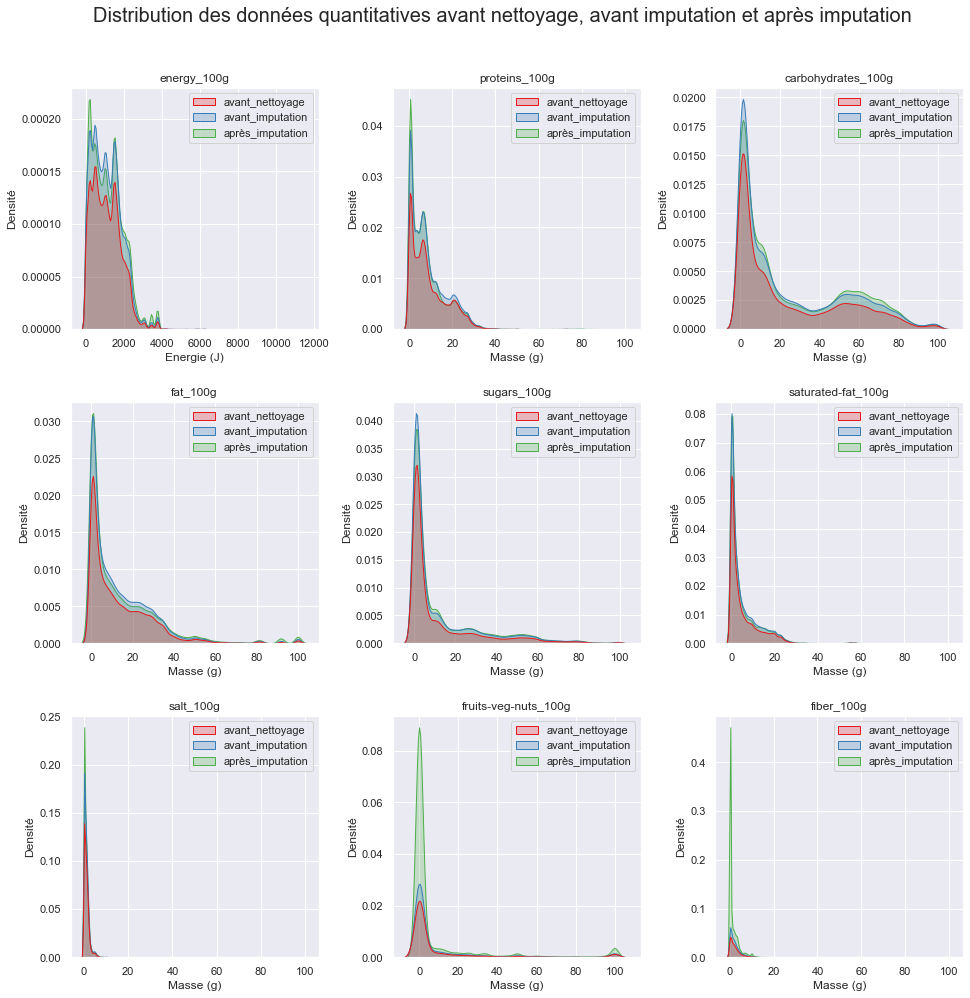

In [28]:
fig = plt.figure(figsize=(16,16))
fig.suptitle('Distribution des données quantitatives avant nettoyage, avant imputation et après imputation', size = 20, y=0.95)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
idx = 1
lbl = 0
for col in df_after_imputation2.columns:  
    df_all = pd.DataFrame(data = np.c_[df_before_cleaning2[[col]], 
                                       df_before_imputation2[[col]], 
                                       df_after_imputation2[[col]]],
                          columns = ['avant_nettoyage',
                                     'avant_imputation',
                                     'après_imputation'])
    
    ax = fig.add_subplot(3, 3, idx)
    ax.set_title(str(col))
    sns.kdeplot(data=df_all, fill=True, palette="Set1", ax=ax)
    plt.ylabel('Densité', fontsize=12)    
    if lbl==0:
        plt.xlabel('Energie (J)', fontsize=12)
        lbl =1
    else :
        plt.xlabel('Masse (g)', fontsize=12)    
    idx = idx + 1

plt.show()

Les 3 distributions de chacune des variables quantitatives sont cohérentes. Il n'y a pas eu de perte d'information ou de gain d'information erronée.

Je regarde maintenant les diagrammes en boîte à moustaches des ces variables.

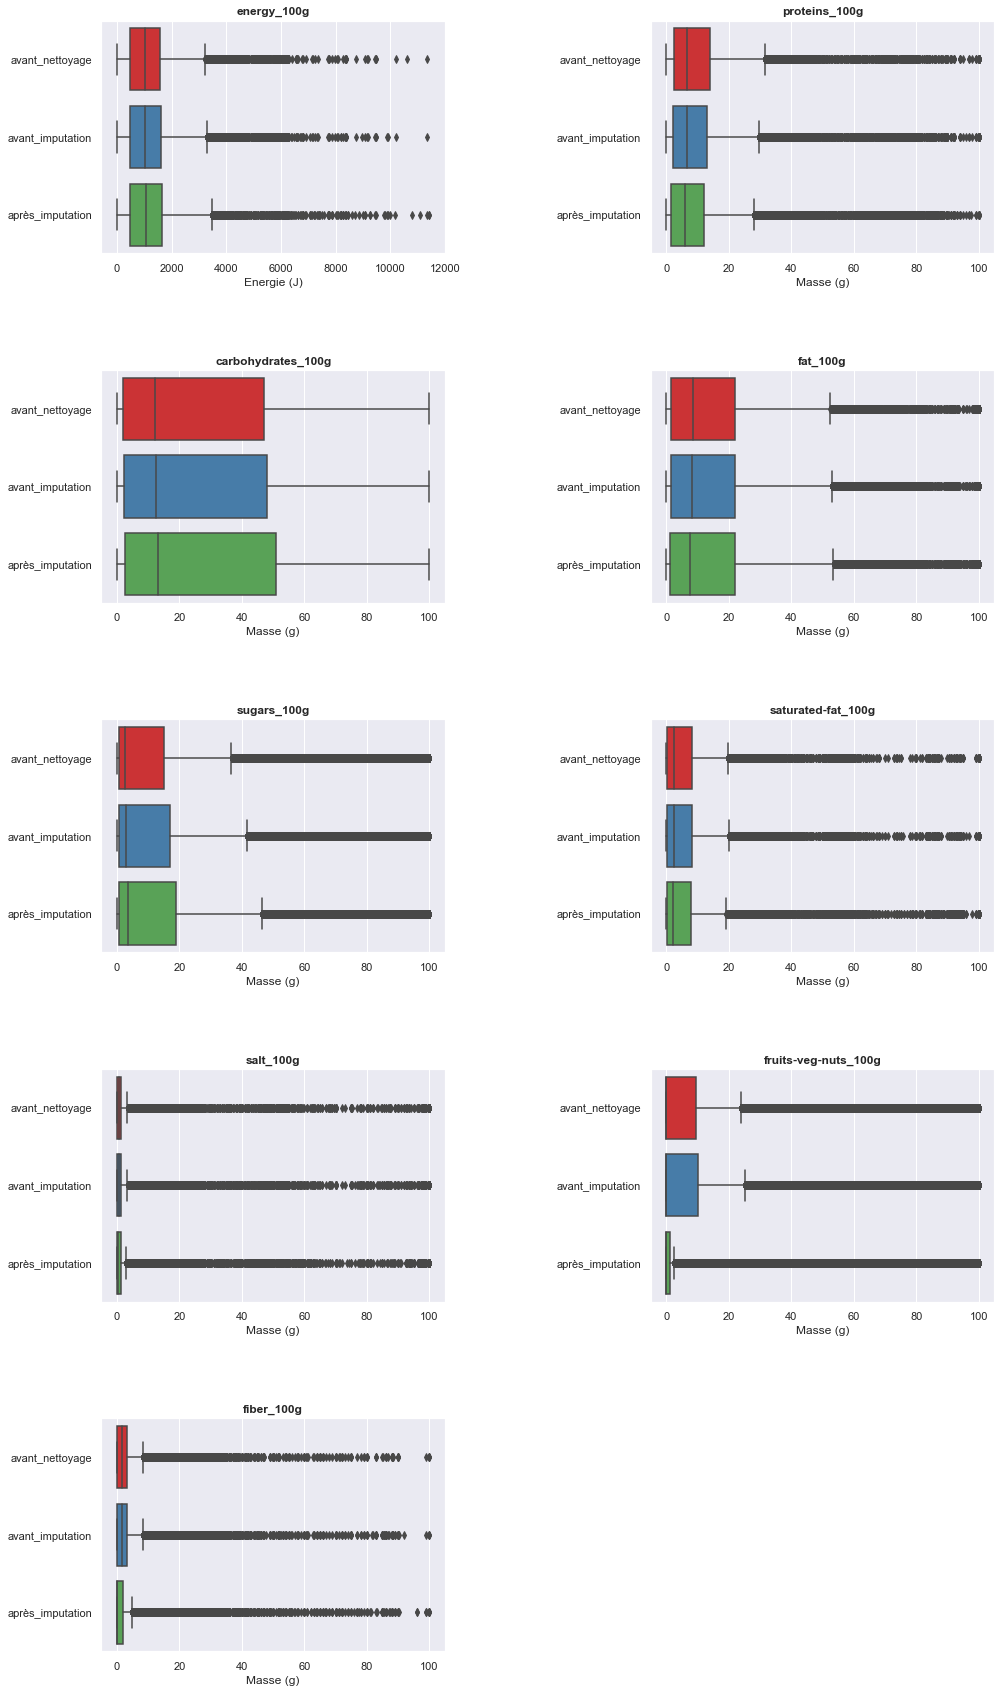

In [29]:
fig = plt.figure(figsize=(16,30))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
idx = 1
lbl = 0
for col in df_after_imputation2.columns:  
    df_all = pd.DataFrame(data = np.c_[df_before_cleaning2[[col]], 
                                       df_before_imputation2[[col]], 
                                       df_after_imputation2[[col]]],
                          columns = ['avant_nettoyage',
                                     'avant_imputation',
                                     'après_imputation'])
    
    ax = fig.add_subplot(5,2, idx)
    ax.set_title(str(col), weight = 'bold')
    sns.boxplot(data=df_all, orient='h', ax=ax, palette="Set1") 
    if lbl==0:
        plt.xlabel('Energie (J)', fontsize=12)
        lbl =1
    else :
        plt.xlabel('Masse (g)', fontsize=12)    
    idx = idx + 1
plt.show()

Je ne peux rien conclure de ces graphiques car de trop nombres valeurs sont supérieures à l'extrémité de la moustache (Q3 +1,5*(Q3-Q1)).

J'enlève ces outliers avec le paramètre 'showfliers = False' dans sns.boxplot (outliers que j'avais conservé jusqu'à présent car les valeurs ne sont pas aberrantes). 

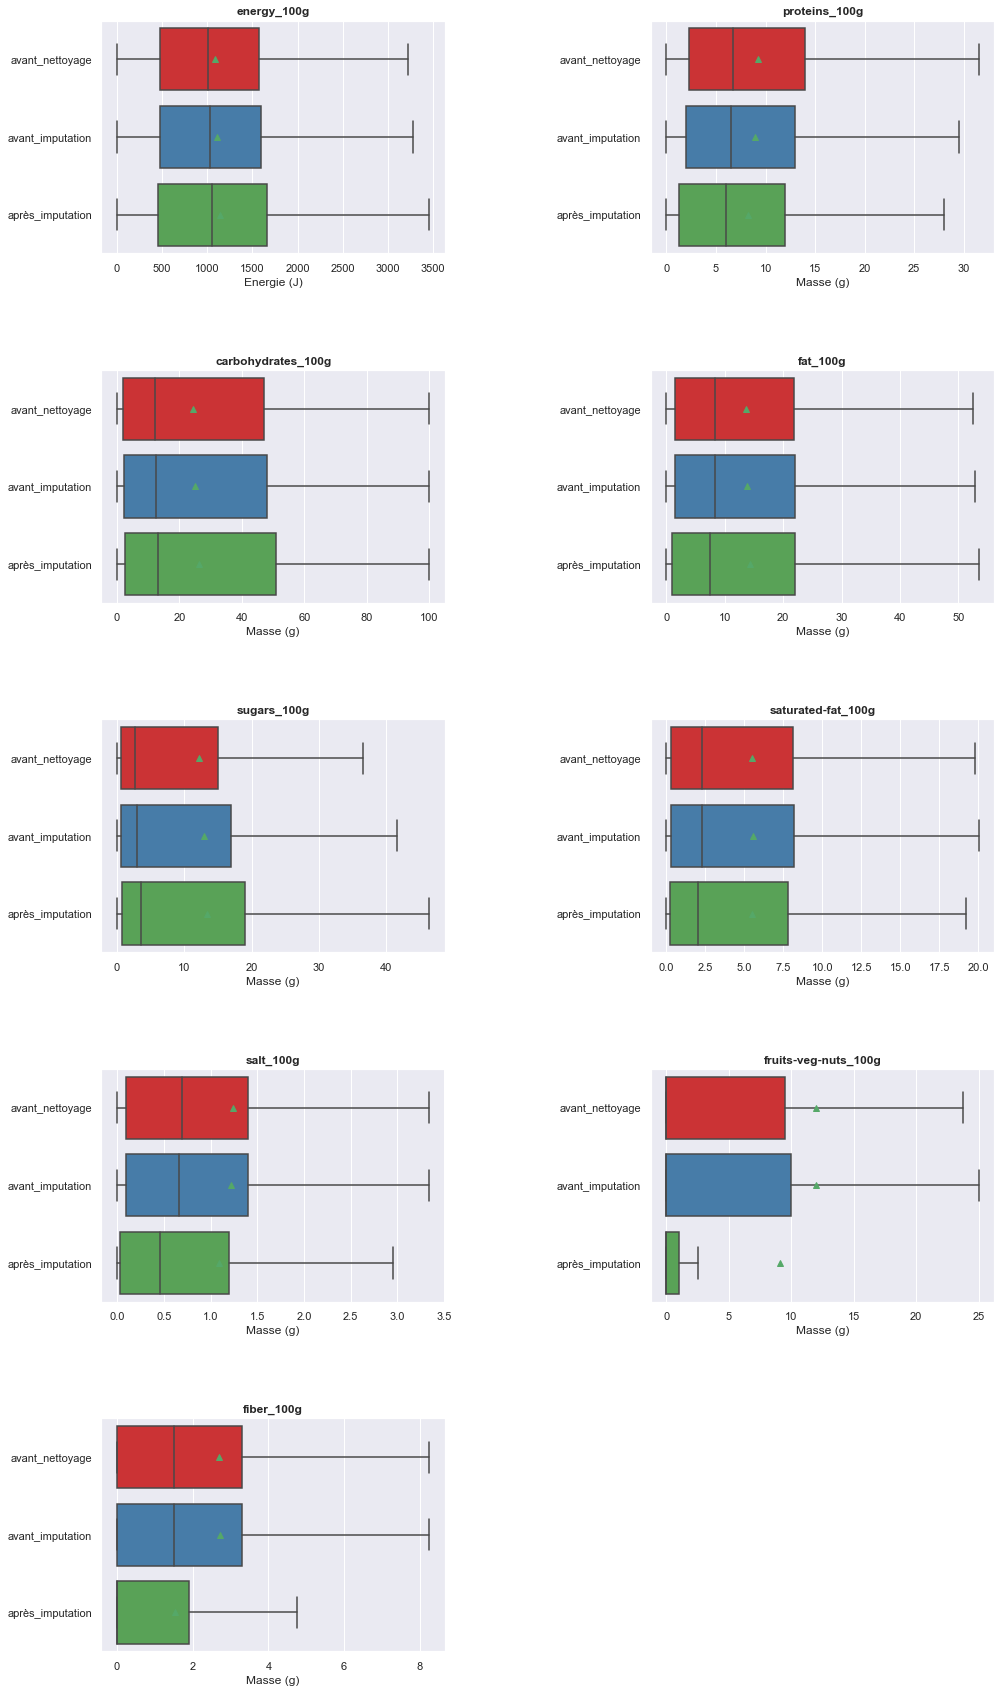

In [30]:
fig = plt.figure(figsize=(16,30))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
idx = 1
lbl = 0
for col in df_after_imputation2.columns:  
    df_all = pd.DataFrame(data = np.c_[df_before_cleaning2[[col]], 
                                       df_before_imputation2[[col]], 
                                       df_after_imputation2[[col]]],
                          columns = ['avant_nettoyage',
                                     'avant_imputation',
                                     'après_imputation'])
    
    ax = fig.add_subplot(5,2, idx)
    ax.set_title(str(col), weight = 'bold')
    sns.boxplot(data=df_all, orient='h', ax=ax, palette="Set1", showfliers = False, showmeans=True)
    if lbl==0:
        plt.xlabel('Energie (J)', fontsize=12)
        lbl =1
    else :
        plt.xlabel('Masse (g)', fontsize=12) 
    idx = idx + 1
plt.show()

Le nettoyage du dataset n'a pas grandement modifié sa structure sauf pour les variables 'fruits-veg-nuts_100g' et 'fiber_100g' ; ceci étant du à l'imputation des valeurs manquantes par des zéros.

Je vais représenter les figures de Lorenz pour chacune des variables quantitatives et calculer l'indice de gini.

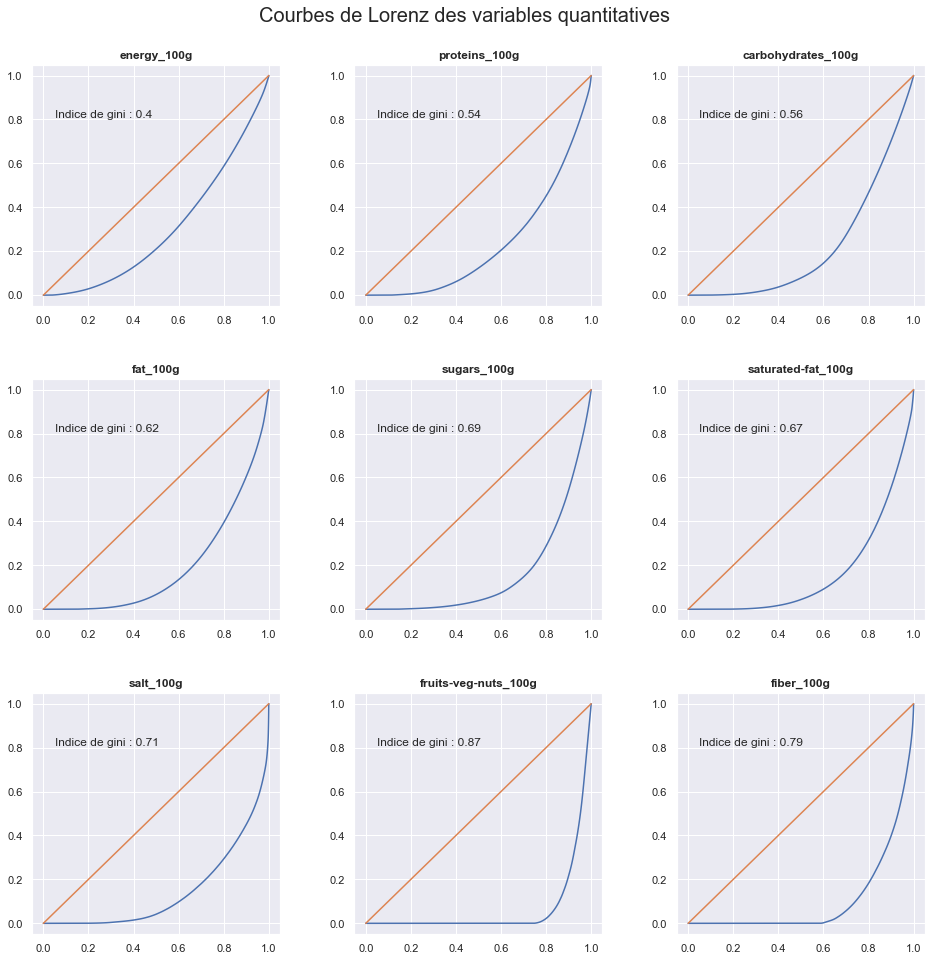

In [31]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
fig.suptitle('Courbes de Lorenz des variables quantitatives', size = 20, y=0.93)
idx = 1

df_lorenz = data.copy()

for col in df_lorenz.select_dtypes(include=['float64']).columns:      
    ax = fig.add_subplot(3, 3, idx)
    ax.set_title(str(col), weight = 'bold')    
    dep = df_lorenz[col].values
    n = len(df_lorenz)
    lorenz = np.cumsum(np.sort(dep)) / dep.sum()
    lorenz = np.append([0],lorenz)   
    
    xaxis = np.linspace(0-1/n,1+1/n,len(lorenz))
    plt.plot(xaxis,lorenz,drawstyle='steps-post')
    plt.plot([0,1], [0,1])
    
    gini = 2 * (0.5 - (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n)
    plt.text(0.05,0.81, 'Indice de gini : ' + str(round(gini,2)), fontsize=12)

    idx = idx + 1

plt.show()


Selon l'indice de gini, la concentration la plus également répartie est celle de l'énergie.

Les concentrations de fruit-veg-nuts et de fibres sont les plus inégalement réparties.

## <font color="#114b98" id="section_3">3. Analyse bivariée</font>

Je regarde maintenant la distribution des variables dans le dataset nettoyé selon la variable 'régime'.

In [32]:
df_distrib_av = data.copy()
df_distrib_av.drop(['code', 'categories'], axis = 1, inplace = True)
df_distrib_av.shape

(280035, 11)

In [33]:
df_distrib_av.groupby('régime').mean()

energy_100g  proteins_100g  carbohydrates_100g   fat_100g  \
régime                                                                        
autres_produits   1190.296759        6.47269           31.378786  14.254742   
viandes_poissons   949.639972       15.31320            6.598595  14.844502   

                  sugars_100g  saturated-fat_100g  salt_100g  \
régime                                                         
autres_produits     16.459145            5.547450   0.900541   
viandes_poissons     1.589311            5.114004   1.855151   

                  fruits-veg-nuts_100g  fiber_100g  
régime                                              
autres_produits              10.562456    1.798877  
viandes_poissons              3.378907    0.460790

In [34]:
df_distrib_av.groupby('régime').median()

energy_100g  proteins_100g  carbohydrates_100g  fat_100g  \
régime                                                                       
autres_produits        1192.0            4.4                22.0       5.9   
viandes_poissons        841.0           15.0                 2.0      11.0   

                  sugars_100g  saturated-fat_100g  salt_100g  \
régime                                                         
autres_produits           6.4                 1.5        0.2   
viandes_poissons          0.7                 3.1        1.3   

                  fruits-veg-nuts_100g  fiber_100g  
régime                                              
autres_produits                    0.0         0.0  
viandes_poissons                   0.0         0.0

In [35]:
df_distrib_av.groupby('régime').std()

energy_100g  proteins_100g  carbohydrates_100g   fat_100g  \
régime                                                                        
autres_produits    864.344041       8.488578           27.898800  19.539312   
viandes_poissons   554.570926       7.893426           10.409407  13.334450   

                  sugars_100g  saturated-fat_100g  salt_100g  \
régime                                                         
autres_produits     20.867052            9.027831   3.918019   
viandes_poissons     3.602754            5.432971   3.322693   

                  fruits-veg-nuts_100g  fiber_100g  
régime                                              
autres_produits              24.755566    3.874461  
viandes_poissons             11.595162    1.521488

In [36]:
(df_distrib_av['régime']=='viandes_poissons').sum()

56712

In [37]:
(df_distrib_av['régime']=='viandes_poissons').shape

(280035,)

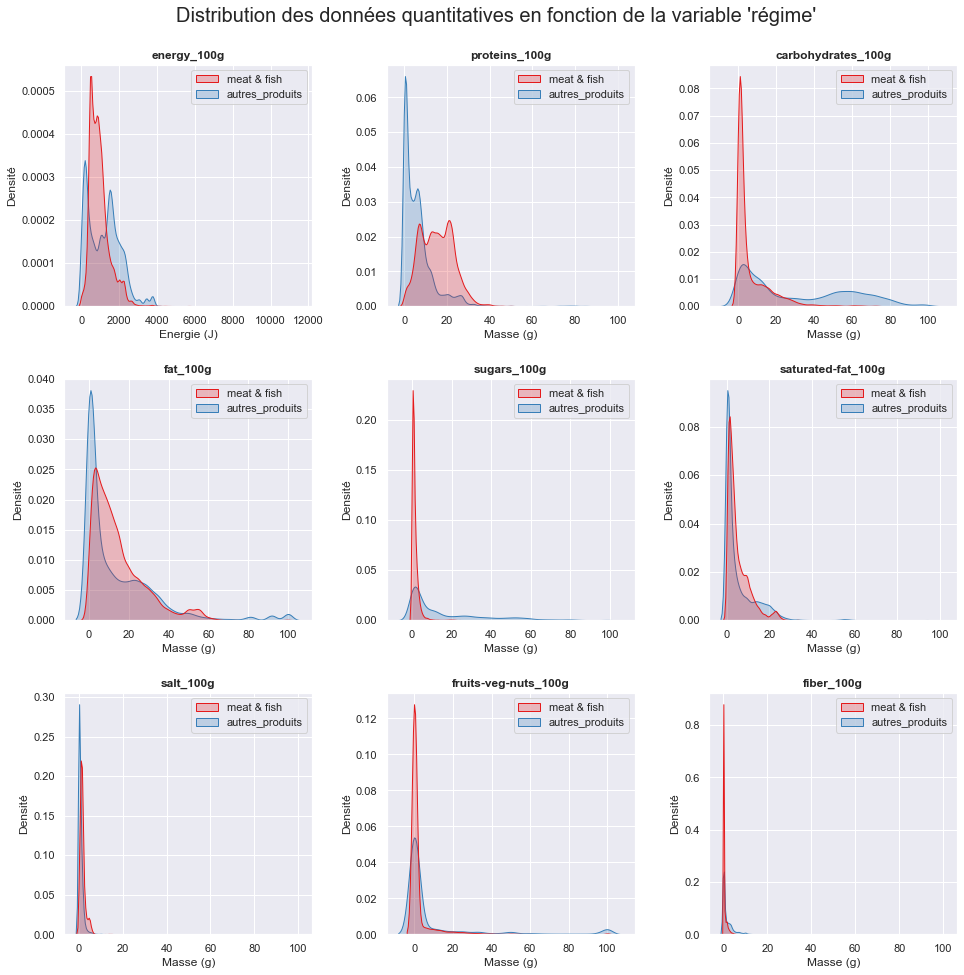

In [38]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
fig.suptitle("Distribution des données quantitatives en fonction de la variable 'régime'", size = 20, y=0.93)
df_distrib_av_temp = df_distrib_av.drop(['régime','nutriscore'], axis = 1)
idx = 1
lbl = 0


for col in df_distrib_av_temp.columns:      
    ax = fig.add_subplot(3, 3, idx)
    ax.set_title(str(col), weight = 'bold')
    df_all = pd.DataFrame(data = np.c_[df_distrib_av_temp[df_distrib_av['régime']=='viandes_poissons'][col].
                                       sample((df_distrib_av['régime']=='viandes_poissons').sum()), 
                                       df_distrib_av_temp[df_distrib_av['régime']=='autres_produits'][col].
                                       sample((df_distrib_av['régime']=='viandes_poissons').sum())],
                          columns = ['meat & fish',
                                     'autres_produits'])
    
    sns.kdeplot(data=df_all, fill=True, palette="Set1", ax=ax)
    plt.ylabel('Densité', fontsize=12)    
    if lbl==0:
        plt.xlabel('Energie (J)', fontsize=12)
        lbl =1
    else :
        plt.xlabel('Masse (g)', fontsize=12)
    idx = idx + 1
plt.show()

Les produits appartenant à la catégorie 'viandes_poissons' semblent avoir une énergie proche de ceux appartenant à la catégorie 'autres_produits' mais ils semblent plus gras, plus riches en protéines et moins sucrés.

Cette hypothèse est en accord à ce qui est attendu pour ce type de produit.

Afin de confirmer cette hypothèse, j'utilise maintenant des diagrammes en boites à moustaches pour représenter les différentes variables quantitatives en fonction de la variable 'régime'.

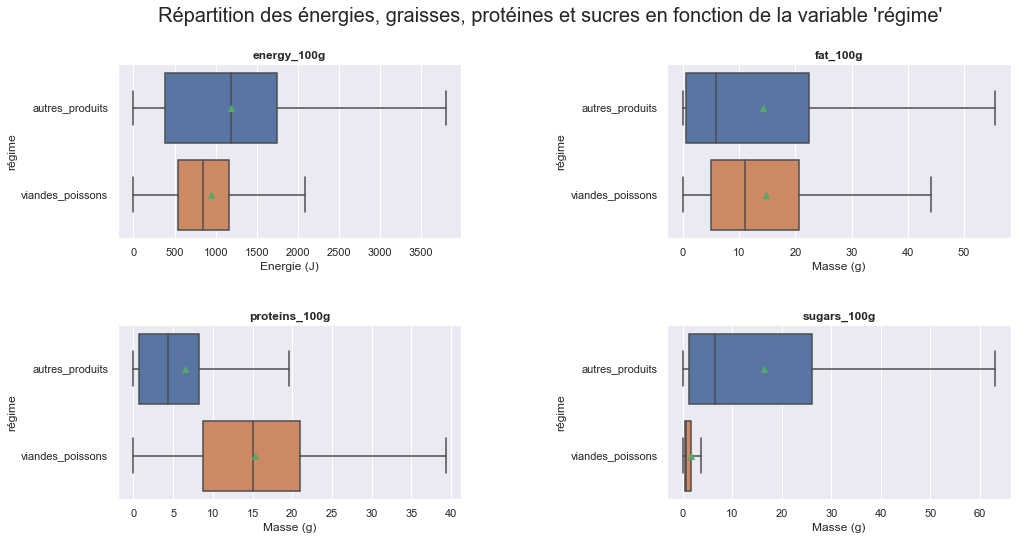

In [39]:
fig = plt.figure(figsize=(16,8))
fig.suptitle("Répartition des énergies, graisses, protéines et sucres en fonction de la variable 'régime'", size = 20, y=0.98)
fig.subplots_adjust(hspace=0.5, wspace=0.6)
idx = 1
lbl = 0
df_after_av_hyp = df_distrib_av[['energy_100g', 'fat_100g', 'proteins_100g', 'sugars_100g', 'régime']] 
for col in df_after_av_hyp.columns[:-1]:      
    ax = fig.add_subplot(2,2, idx)
    ax.set_title(str(col), weight = 'bold')
    sns.boxplot(data=df_after_av_hyp, x=col, y="régime", orient='h', ax=ax, showfliers = False, showmeans=True) 
    
    
    if lbl==0:
        plt.xlabel('Energie (J)', fontsize=12)
        lbl =1
    else :
        plt.xlabel('Masse (g)', fontsize=12)    
    idx = idx + 1
plt.show()

Les différentes boîtes à moustaches confirment l'hypothèse énoncée précédemment : les produits appartenant à la catégorie 'viandes_poissons' sont plus gras, plus riches en protéines et moins sucrés, les montants énergétiques sont proches (légèrement plus énergétiques pour les produits appartenant à 'autres_produits'.

Je regarde maintenant la répartition des données quantitatives à l'aide d'un sns.pairplot, en colorant en rouge les observations pour lesquelles 'régime' vaut 'viandes_poissons'.

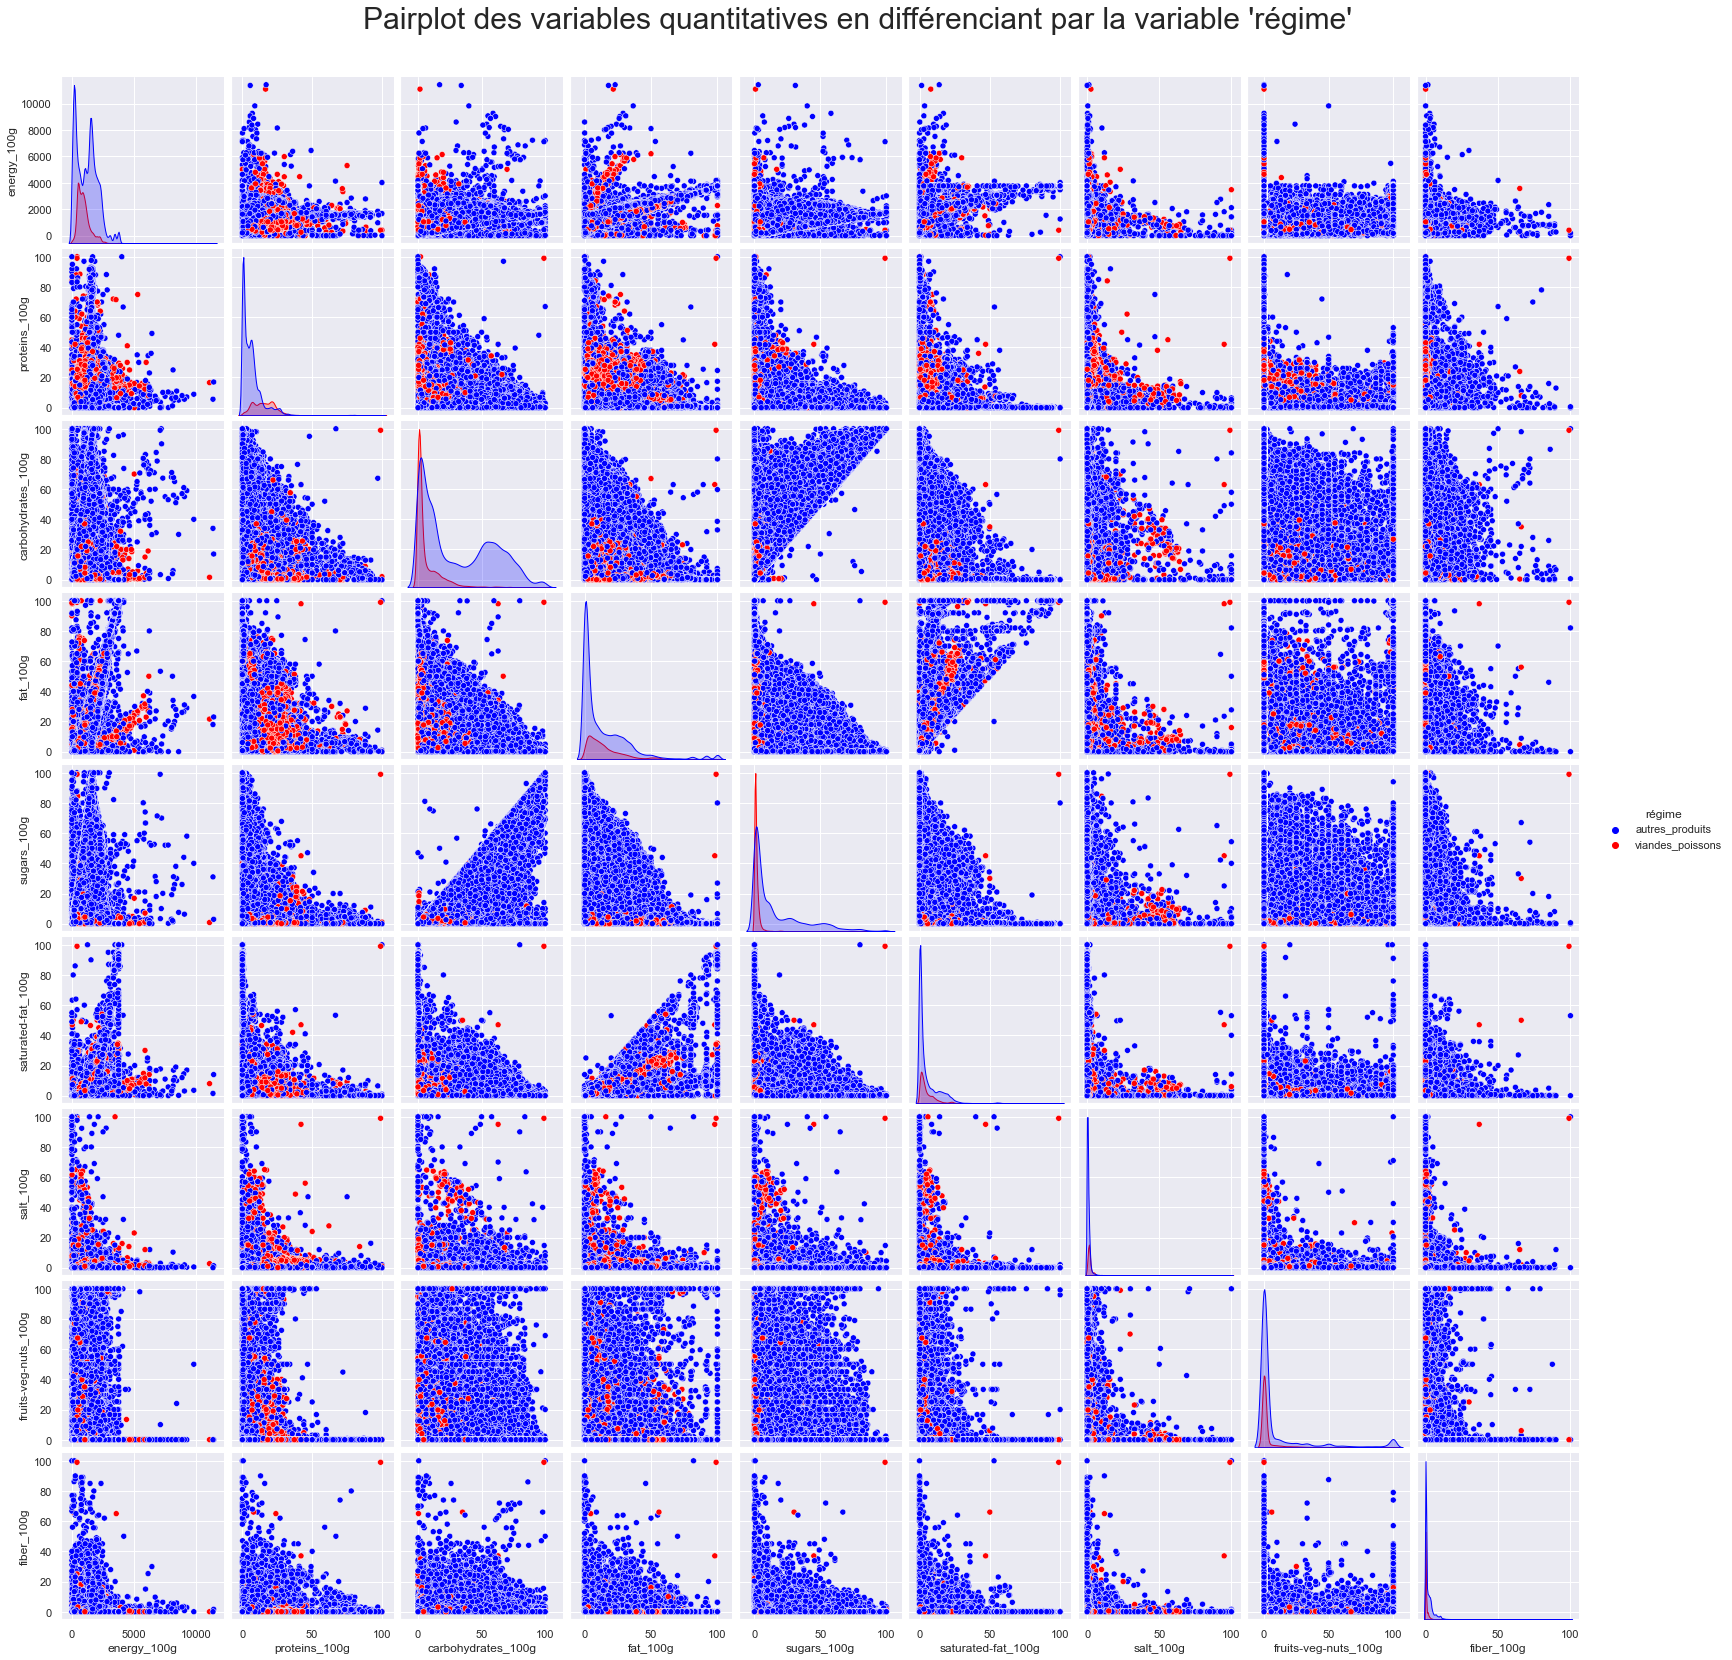

In [40]:
g = sns.pairplot(df_distrib_av.sample(frac=0.5), hue='régime', palette={"viandes_poissons": "red", "autres_produits": "blue"})
g.fig.suptitle("Pairplot des variables quantitatives en différenciant par la variable 'régime'", y=1.03, size = 30);

J'utilise un pd.crosstab afin de comparer la distribution dans 'régime' des produits très énergétiques (ceux qui ont une valeur supérieure au 3ème quartile).

In [41]:
pd.crosstab(df_distrib_av['energy_100g']>df_distrib_av['energy_100g'].quantile([0.75])[0.75], df_distrib_av['régime'])

régime       autres_produits  viandes_poissons
energy_100g                                   
False                 159288             50748
True                   64035              5964

Je remarque que peu de produits très énergétiques sont des viandes ou poissons.

Je réalise une pd.crosstab afin de regarder les autres distributions de produits ayant une valeur supérieure au 3ème quartile de la variable considérée.

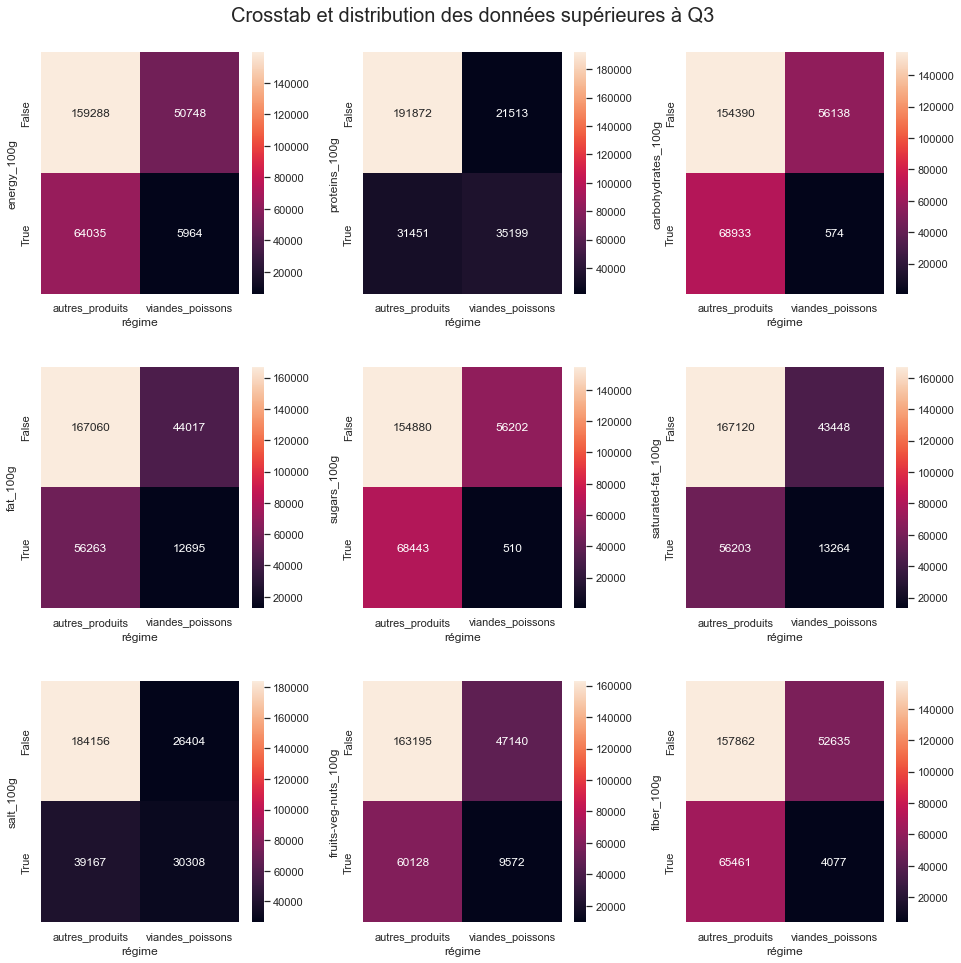

In [42]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
fig.suptitle("Crosstab et distribution des données supérieures à Q3", size = 20, y=0.92)
idx = 1

for col in df_distrib_av.select_dtypes(include=['float64']).columns:      
    ax = fig.add_subplot(3, 3, idx)
    
    sns.heatmap(pd.crosstab(df_distrib_av[col]>df_distrib_av[col].quantile([0.75])[0.75],df_distrib_av['régime']), 
                annot=True, 
                fmt='d',
               ax=ax)
    idx = idx + 1
plt.show()

Je retrouve comme attendu beaucoup de produits très protéinés, peu sucré et peu riche en fibres appartenant à la catégorie 'viandes_poissons'.

Je regarde aussi avec un sns.regplot l'allure d'une régression linéaire entre les variables quantitatives et la variable énergie.

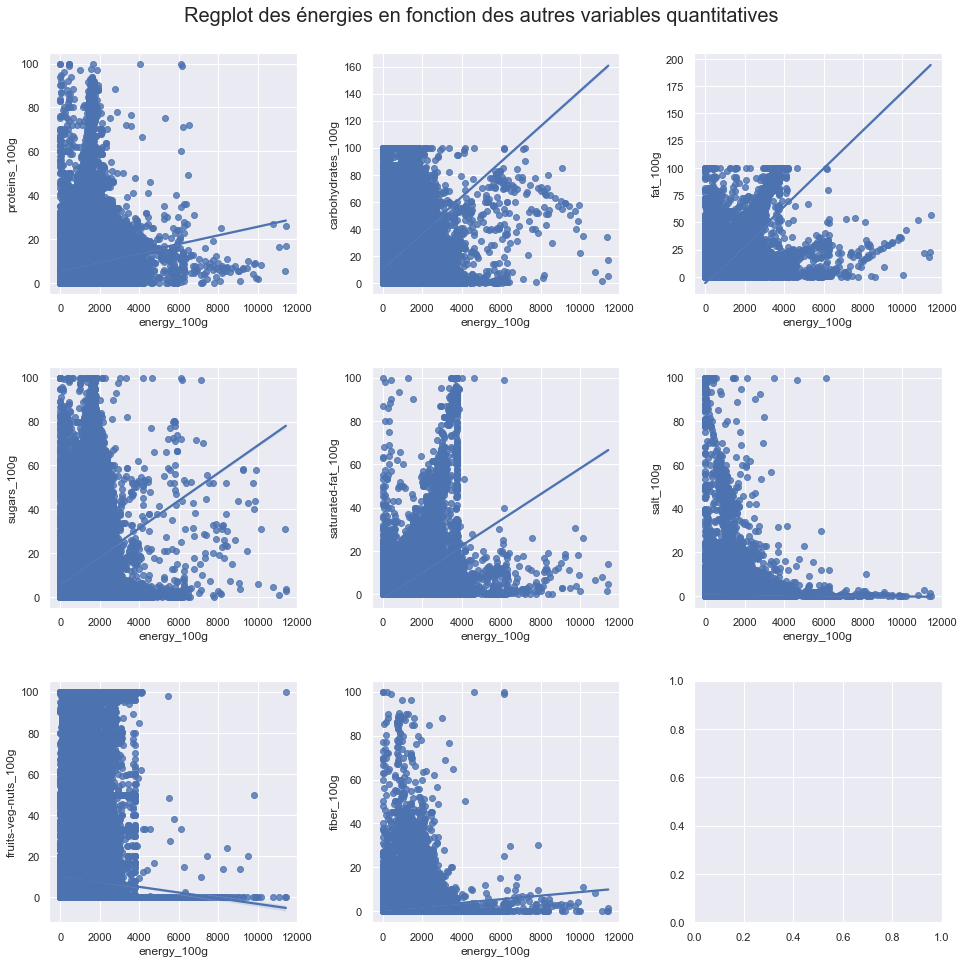

In [43]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
fig.suptitle("Regplot des énergies en fonction des autres variables quantitatives", size = 20, y=0.92)
idx = 1

for col in df_distrib_av.select_dtypes(include=['float64']).columns:  
    sns.regplot(x='energy_100g', y=col, data=df_distrib_av, ax=ax);
    ax = fig.add_subplot(3, 3, idx)
    idx = idx + 1
plt.show()

Je fais maintenant une ANOVA entre les variables 'régime' et 'energy_100g'.

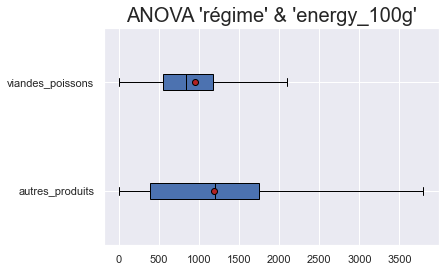

In [44]:
X = 'régime'
Y = 'energy_100g'
sous_echantillon = data.copy()
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("ANOVA 'régime' & 'energy_100g'", size = 20, y=1)
plt.show()

In [45]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.014014485950796336

η²(Y/X) est très proche de zéro.

Il n’y a donc à priori pas de corrélation entre les variables 'régime' et 'energy_100g'.

Je fais maintenant une seconde ANOVA entre les variables 'régime' et 'proteins_100g'.

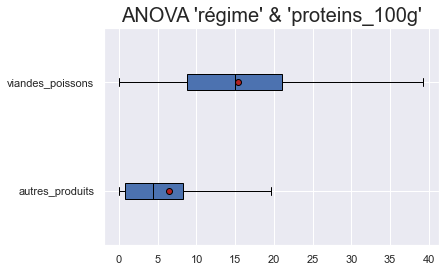

In [46]:
Y = 'proteins_100g'
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("ANOVA 'régime' & 'proteins_100g'", size = 20, y=1)
plt.show()

In [47]:
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.15262151540757754

η²(Y/X) ≈ 0.15

Il y a donc une faible correlation entre les variables 'régime' et 'proteins_100g'.

Je vais regarder maintenant la répartition des Nutri-Scores en fonction de la variable 'régime'.

In [48]:
count_nutri_mf_df = data['nutriscore'][data['régime'] == 'viandes_poissons'].value_counts()
count_nutri_mf_df.sort_index(axis=0, inplace = True)
count_nutri_ot_df = data['nutriscore'][data['régime'] == 'autres_produits'].value_counts()
count_nutri_ot_df.sort_index(axis=0, inplace = True)
nutri_colors_2 = ['#008B4C','#7FC241','#FECA0A','#F58220','#EF3E22']

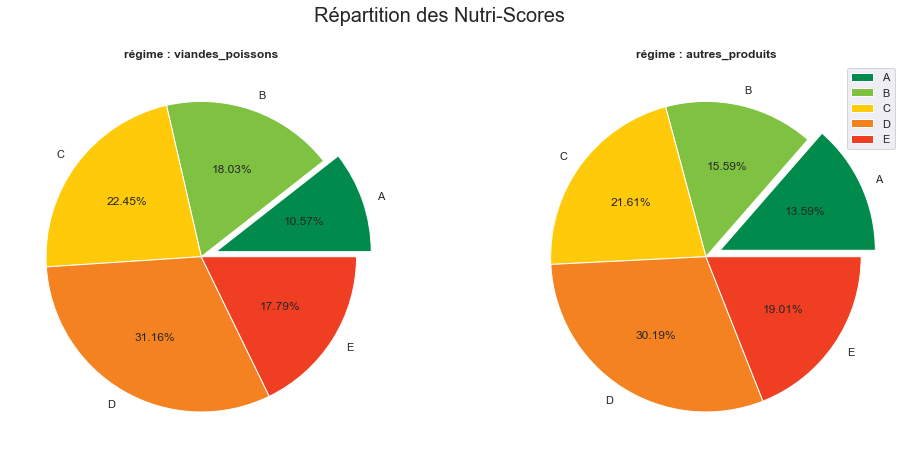

In [49]:
fig = plt.figure(figsize=(16,10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
fig.suptitle("Répartition des Nutri-Scores", size = 20, y=0.85)
    
ax = fig.add_subplot(1,2,1)
ax.set_title('régime : viandes_poissons', weight = 'bold')
plt.pie(count_nutri_mf_df.values, labels=count_nutri_mf_df.index, colors=nutri_colors_2, 
        autopct = lambda x: str(round(x, 2)) + '%', explode = [0.1, 0, 0, 0, 0]);   
    
ax = fig.add_subplot(1,2,2)
ax.set_title('régime : autres_produits', weight = 'bold')   
plt.pie(count_nutri_ot_df.values, labels=count_nutri_ot_df.index, colors=nutri_colors_2, 
        autopct = lambda x: str(round(x, 2)) + '%', explode = [0.1, 0, 0, 0, 0]);  
plt.legend() 
plt.show()

Je remarque que les proportions sont globalement les mêmes, avec un léger avantage de répartition entre les Nutri-Scores A et B en faveur des produits catégorisés 'autres_produits' mais aussi davatange de produits E dans la catégorie 'autres_produits'.

## <font color="#114b98" id="section_4">4. Analyse multivariée</font>

A l'aide d'un sns.clustermap, je compte retrouver les corrélations entre les différentes variables :
 - fat & saturated-fat
 - sugars & carbohydrates 

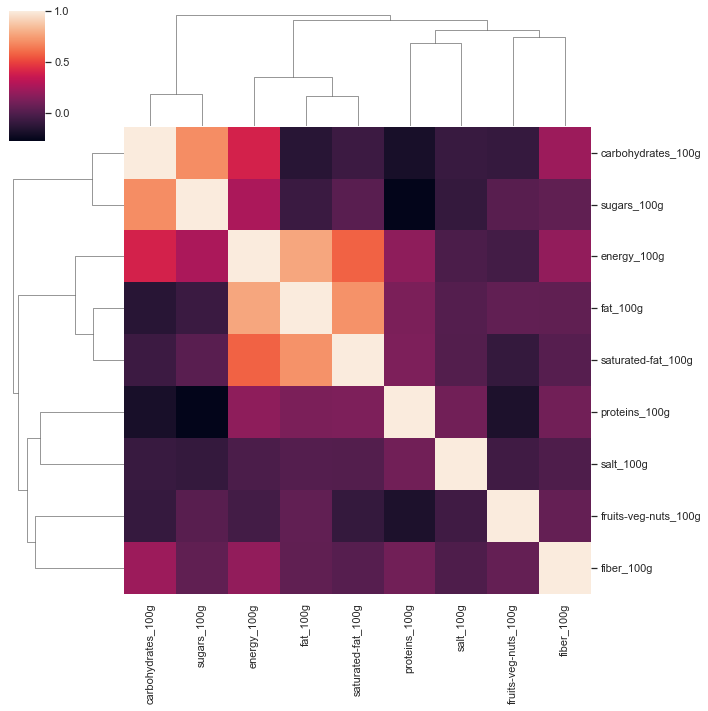

In [50]:
sns.clustermap(df_distrib_av.select_dtypes(include=['float64']).corr());

Je retrouve bien la corrélation entre 'carbohydrates_100g' et 'sugars_100g'.

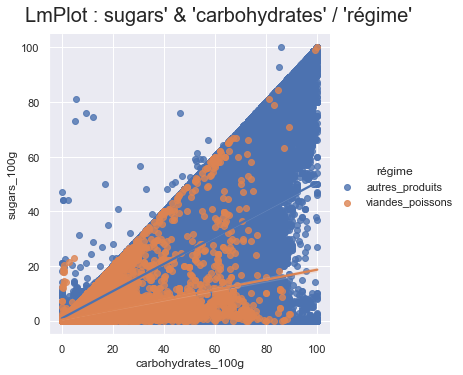

In [51]:
g = sns.lmplot(x='carbohydrates_100g', y='sugars_100g', hue='régime', data=df_distrib_av);
g.fig.suptitle("LmPlot : sugars' & 'carbohydrates' / 'régime'", size = 20, y=1.04);

Les observations appartenant à la catégorie 'viandes_poissons' ont tendance à avoir un taux de sucres plus faible que celles appartenant à 'autres_produits' quand leur taux de carbohydrates augmente.

J'observe aussi la corrélation entre 'fat_100g' et 'saturated-fat_100g'.

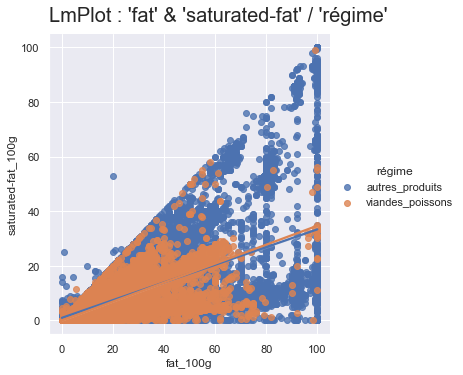

In [52]:
g = sns.lmplot(x='fat_100g', y='saturated-fat_100g', hue='régime', data=df_distrib_av);
g.fig.suptitle("LmPlot : 'fat' & 'saturated-fat' / 'régime'", size = 20, y=1.04);

Les observations appartenant aux deux catégories ont une progression semblable entre leurs taux de graisses et leurs taux de graisses saturées.

Je regarde maintenant la répartition des données quantitatives à l'aide d'un sns.pairplot, en colorant les observations selon leurs Nutri-Scores.

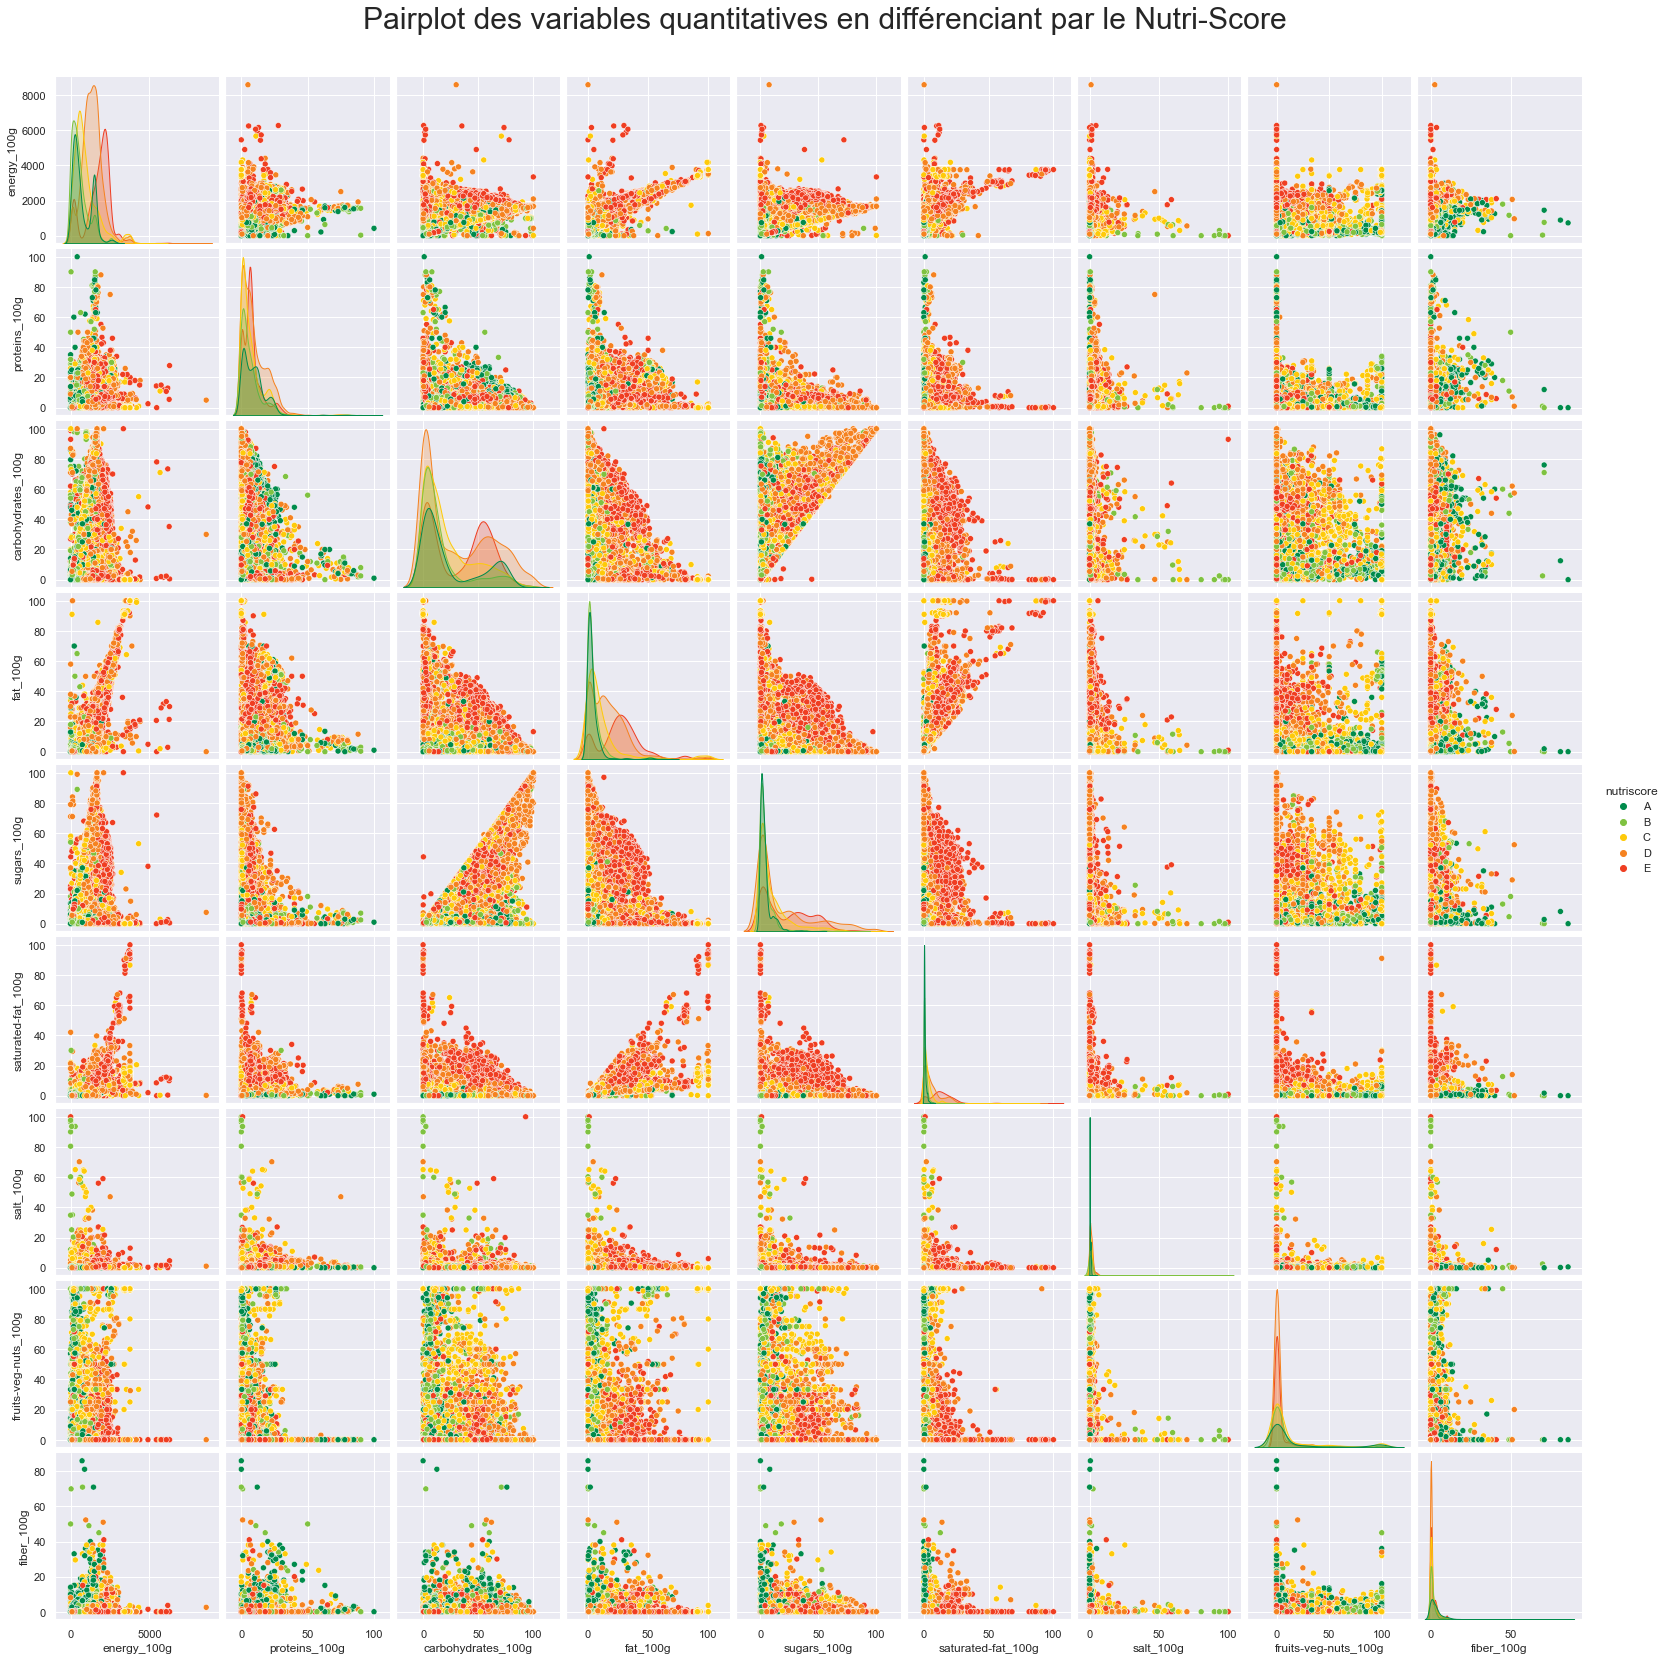

In [53]:
g = sns.pairplot(data.sample(frac=0.05), hue="nutriscore", palette=nutri_colors, hue_order=['A','B','C','D','E'])
g.fig.suptitle("Pairplot des variables quantitatives en différenciant par le Nutri-Score", y=1.03, size = 30);

On constate que les produits les plus gras et les plus sucrés ont des Nutri-Scores D ou E.

In [54]:
nutri_colors = {'A':'#008B4C','B':'#7FC241','C':'#FECA0A','D':'#F58220','E':'#EF3E22'}

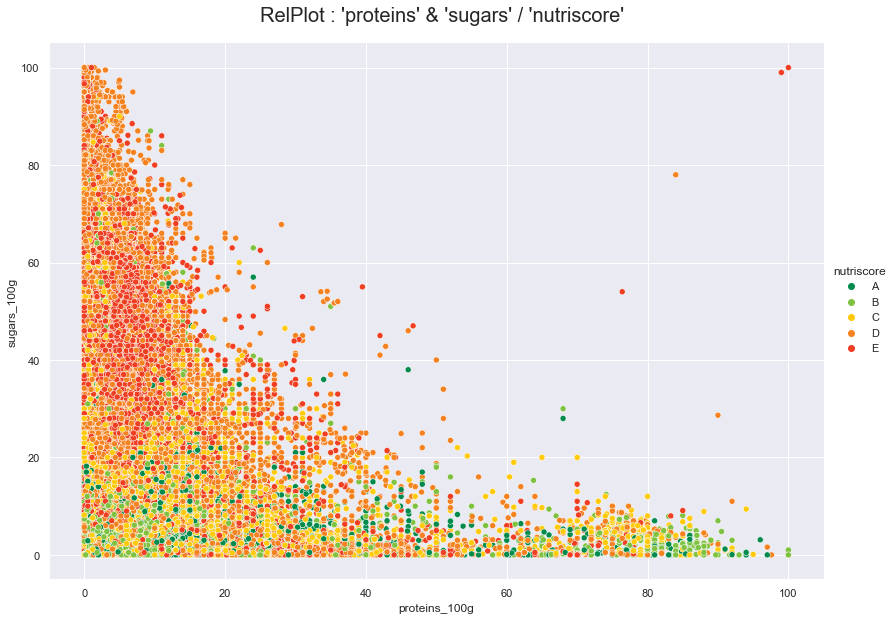

In [55]:
g = sns.relplot(x='proteins_100g', y='sugars_100g', hue='nutriscore', data=data, 
                palette=nutri_colors, height=8.27, aspect=11.7/8.27, hue_order=['A','B','C','D','E']);
g.fig.suptitle("RelPlot : 'proteins' & 'sugars' / 'nutriscore'", size = 20, y=1.04);

Les viandes et poissons sont souvent ventés pour leur apport en protéines. Je regarde comment sont réparties les protéines selon le nutriscore et le type de 'régime'.

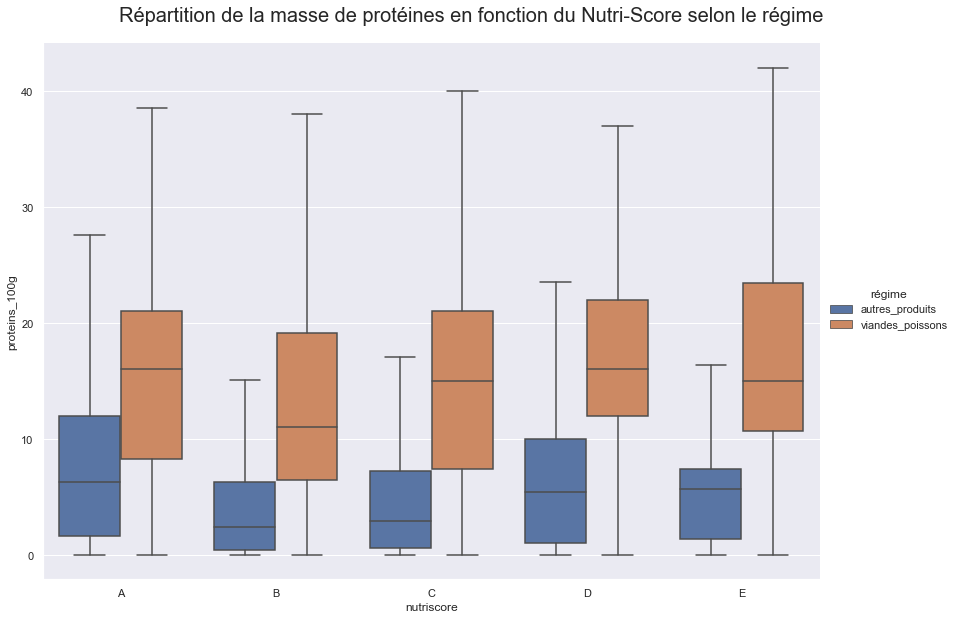

In [56]:
g = sns.catplot(data=data, x='nutriscore', y='proteins_100g', hue='régime',
            kind="box", showfliers = False, order=['A','B','C','D','E'], 
            height=8.27, aspect=11.7/8.27)
g.fig.suptitle("Répartition de la masse de protéines en fonction du Nutri-Score selon le régime", size = 20, y=1.04);

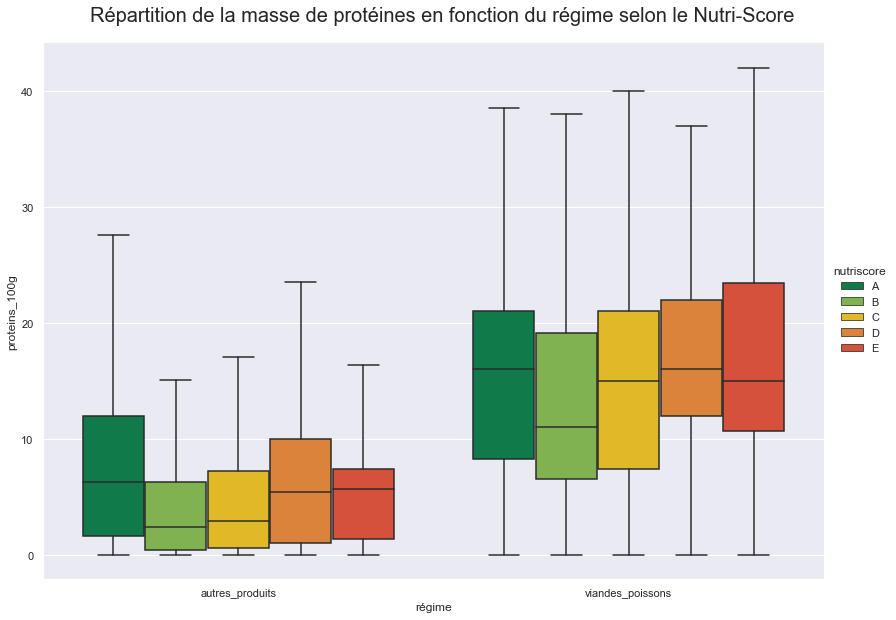

In [57]:
g = sns.catplot(data=data, x='régime', y='proteins_100g', hue='nutriscore', palette=nutri_colors, 
            kind="box", showfliers = False, hue_order = ['A','B','C','D','E'], 
            height=8.27, aspect=11.7/8.27)
g.fig.suptitle("Répartition de la masse de protéines en fonction du régime selon le Nutri-Score", size = 20, y=1.04);

Je regarde aussi pour l'énergie.

<Figure size 864x576 with 0 Axes>

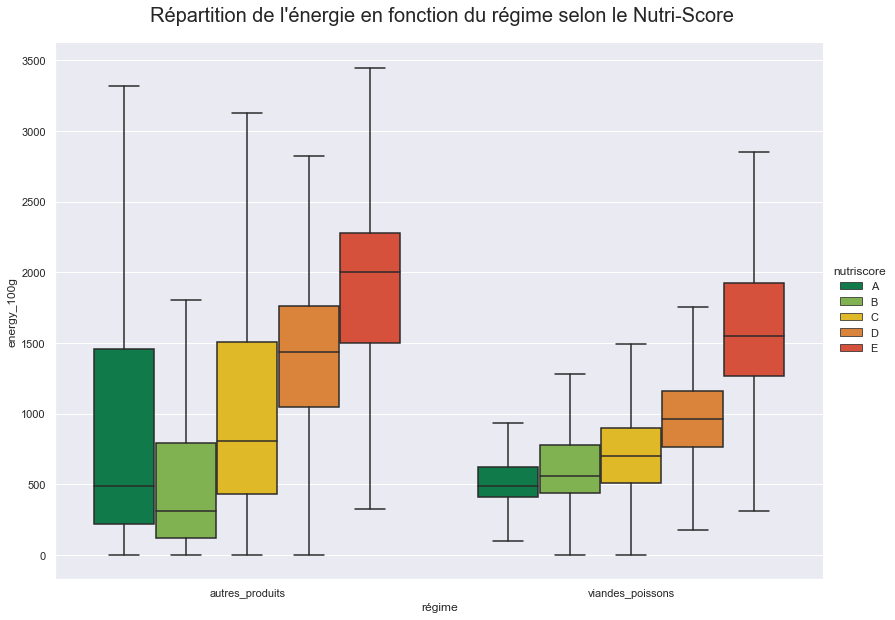

In [58]:
fig = plt.figure(figsize=(12,8))
g = sns.catplot(data=data, x='régime', y='energy_100g', hue='nutriscore', palette=nutri_colors, 
            kind="box", showfliers = False, hue_order = ['A','B','C','D','E'], 
            height=8.27, aspect=11.7/8.27)
g.fig.suptitle("Répartition de l'énergie en fonction du régime selon le Nutri-Score", size = 20, y=1.04);

L'un des objectif de ce travail est de déterminter si les produits sans viandes et poissons peuvent remplacer les produits avec.

In [59]:
df_top_autres_produits = data[data['régime']=='autres_produits']

In [60]:
df_top_meatfish = data[data['régime']=='viandes_poissons']

In [61]:
df_top_meatfish['proteins_100g'].quantile([0.25])[0.25]

8.8

Je sélectionne les produits 'autres_produits' ayant au minimum une valeur en protéines supérieure au 1er quartile des produits avec viandes.

In [62]:
df_top_autres_produits = df_top_autres_produits[df_top_autres_produits['proteins_100g']>df_top_meatfish['proteins_100g'].quantile([0.25])[0.25]]

In [63]:
df_top_autres_produits['proteins_100g']>df_top_meatfish['proteins_100g'].quantile([0.25])[0.25]

5         True
18        True
50        True
52        True
59        True
          ... 
280007    True
280008    True
280011    True
280013    True
280019    True
Name: proteins_100g, Length: 51474, dtype: bool

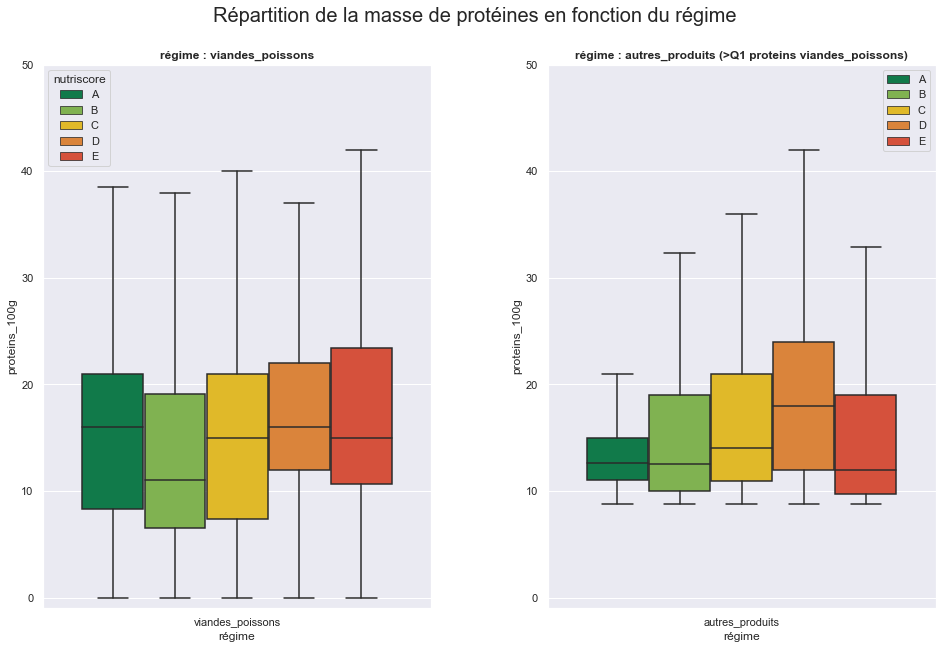

In [64]:
fig = plt.figure(figsize=(16,10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
fig.suptitle("Répartition de la masse de protéines en fonction du régime", size = 20, y=0.96)
    
ax = fig.add_subplot(1,2,1)
ax.set_ylim(-1,50)
ax.set_title('régime : viandes_poissons', weight = 'bold')
sns.boxplot(data=df_top_meatfish, x='régime', y='proteins_100g', hue='nutriscore', palette=nutri_colors, 
            showfliers = False, hue_order = ['A','B','C','D','E'], orient = 'v', ax=ax)

ax = fig.add_subplot(1,2,2)
ax.set_ylim(-1,50)
ax.set_title('régime : autres_produits'+str(' (>Q1 proteins viandes_poissons)'), weight = 'bold')   
sns.boxplot(data=df_top_autres_produits, x='régime', y='proteins_100g', hue='nutriscore', palette=nutri_colors, 
            showfliers = False, hue_order = ['A','B','C','D','E'], orient = 'v', ax=ax)

plt.legend() 
plt.show()

Nous pouvons voir que si l'on considères les produits 'autres_produits' plus protéinés que Q1, il est parfaitement possible de trouver des produits qui ont des valeurs en protéines semblables.